# Choix de la profondeur de la source 

Il s'agit d'optimiser les positions de la source et du flotteur sous différents profils de célérité.

- **Source** : de 0 à 100m
- **Flotteur** : de 100 à 500m
- 4 profils en Méditerrannée + 3 profils sur la zone du Gulf Stream

In [1]:
# this enable automatic reloading of libraries
%load_ext autoreload
%autoreload 2

from clib.flow import *
from clib.bellhop import *

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')


In [2]:
s = bellhop({'mediterrannee': '../SSP_4profils.mat'},name='med_2000m')

# Profil n°3 
---
---
---
## Création des fichiers environnement (.env)

Ici pour le profil de célérité 1, on créé les fichiers environnement (.env) suivant les paramètres choisis :
- La profondeur de la source (*zs*) varie. 
- On a deux types de fichiers (*file_type*) : 'R' pour les tracés de rayons et 'IB' pour les pertes par propagation.
- Pour les tracés de rayons, les calculs sont faits pour des angles entre -15° et +15° (*ALimites*) pour plus de lisibilité.


In [15]:
issp=2                          # sound speed profile number
depth_source = [10.]
#depth_source = [15.,30.,100.]   # list of chosen source depths

## 'R' files
s.params['file_type'] = 'R'
s.params['ALimites'] = [-15.0, 15.0]
for i in depth_source : 
    s.params['zs']=i
    s.generate_envfile('mediterrannee',Issp=issp, SSP_depth_step=10, \
                        file_env ='%dm_%s.env' %(i,s.params['file_type']))
    s.generate_btyfile(file_env = '%dm_%s.env' %(i,s.params['file_type']), bathy=2000.)

## 'IB' files    
s.params['file_type'] = 'IB'
s.params['ALimites'] = [-90.0, 90.0]
s.params['NDepth'] = 501
s.params['NRange'] = 1001
for i in depth_source : 
    s.params['zs']=i
    s.generate_envfile('mediterrannee',Issp=issp, SSP_depth_step=10, \
                        file_env = '%dm_%s.env' %(i,s.params['file_type']))
    s.generate_btyfile(file_env = '%dm_%s.env' %(i,s.params['file_type']), bathy=2000.)

On lance ensuite les simulations bellhop. on obtient les fichiers '.ray' et '.shd'.

## Résultats pour le profil 3 (thermocline à 20m)

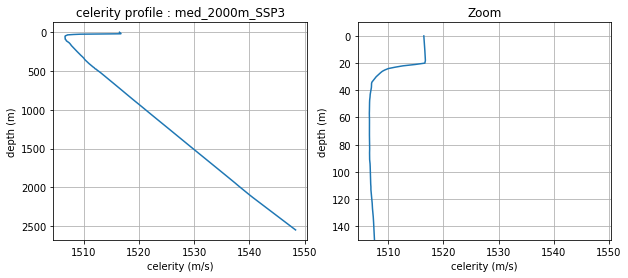

In [8]:
s.plotssp('mediterrannee', Issp=2)

### Source à 10m

In [20]:
geometry10, pressure10 = s.readshd('files_temp/10m_IB.shd')

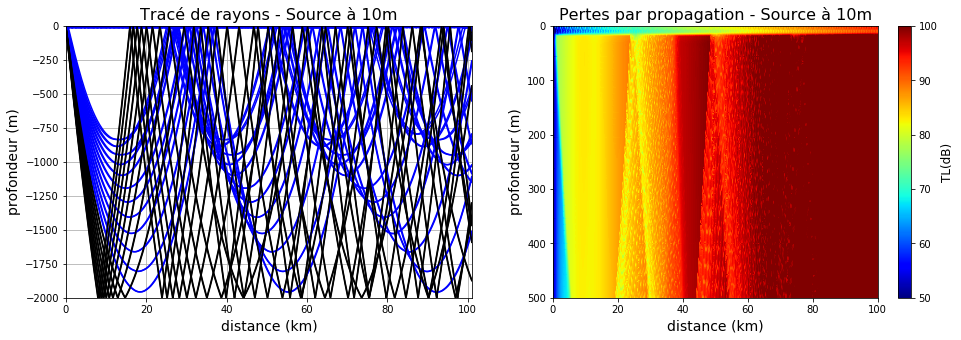

In [29]:
plt.figure(figsize=(16,5))

plt.subplot(121)
s.plotray('files_temp/10m_R.ray')
plt.title('Tracé de rayons - Source à 10m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)


plt.subplot(122)
s.plotshd (geometry10, pressure10)
plt.title ('Pertes par propagation - Source à 10m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)

plt.savefig('source10m', dpi=100)

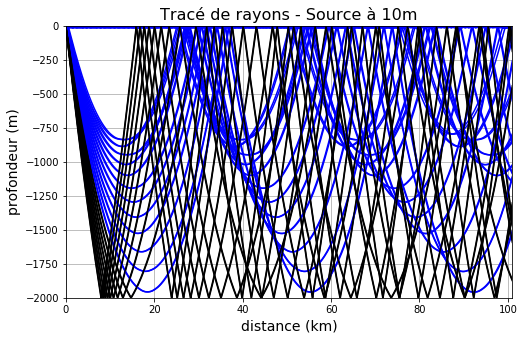

In [27]:
plt.figure(figsize=(8,5))
s.plotray('files_temp/10m_R.ray')
plt.title('Tracé de rayons - Source à 10m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)

plt.savefig('rays10m', dpi=100)

### Source à 15m

In [11]:
geometry15, pressure15 = s.readshd('files_temp/15m_IB.shd')

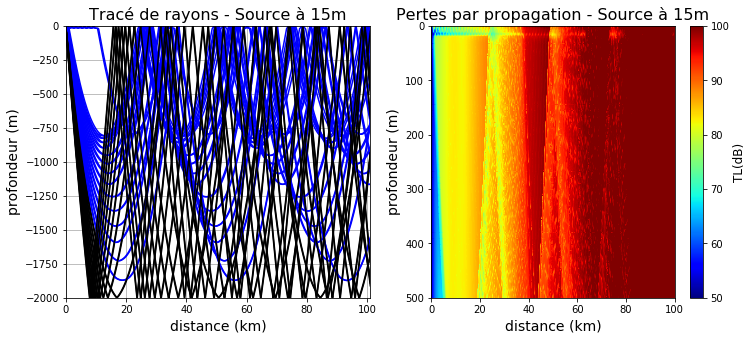

In [16]:
plt.figure(figsize=(12,5))

plt.subplot(121)
s.plotray('files_temp/15m_R.ray')
plt.title('Tracé de rayons - Source à 15m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)


plt.subplot(122)
s.plotshd (geometry15, pressure15)
plt.title ('Pertes par propagation - Source à 15m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)

plt.savefig('source15m', dpi=100)

---
---
### Source à 30m


In [13]:
geometry30, pressure30 = s.readshd('files_temp/30m_IB.shd')

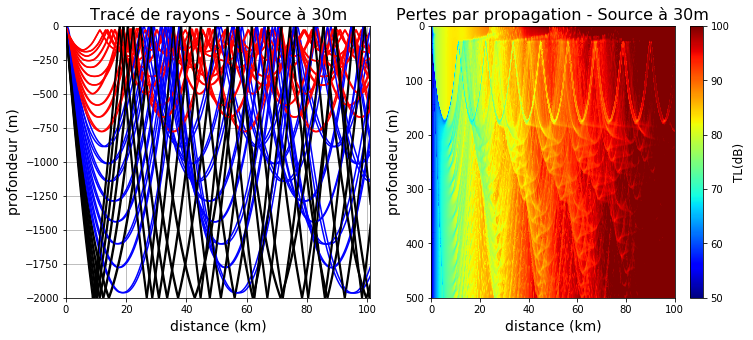

In [17]:
plt.figure(figsize=(12,5))

plt.subplot(121)
s.plotray('files_temp/30m_R.ray')
plt.title('Tracé de rayons - Source à 30m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)


plt.subplot(122)
s.plotshd (geometry30, pressure30)
plt.title ('Pertes par propagation - Source à 30m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)

plt.savefig('source30m', dpi=100)

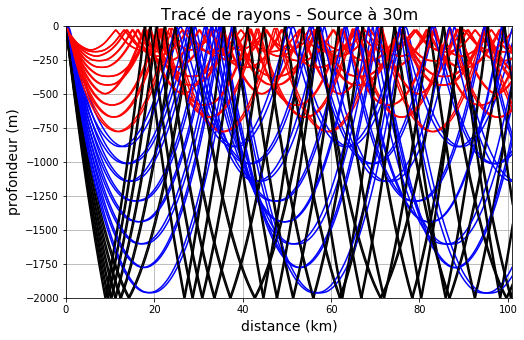

In [30]:
plt.figure(figsize=(8,5))
s.plotray('files_temp/30m_R.ray')
plt.title('Tracé de rayons - Source à 30m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)

plt.savefig('rays30m', dpi=100)

---
---
### Source à 100m

In [18]:
geometry100, pressure100 = s.readshd('files_temp/100m_IB.shd')

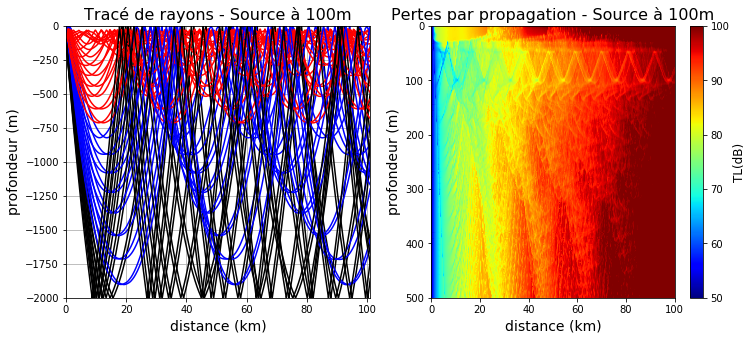

In [22]:
plt.figure(figsize=(12,5))

plt.subplot(121)
s.plotray('files_temp/100m_R.ray')
plt.title('Tracé de rayons - Source à 100m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)


plt.subplot(122)
s.plotshd (geometry100, pressure100)
plt.title ('Pertes par propagation - Source à 100m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)

plt.savefig('source100m', dpi=100)

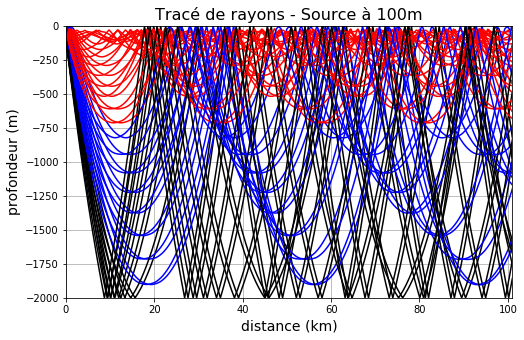

In [31]:
plt.figure(figsize=(8,5))
s.plotray('files_temp/100m_R.ray')
plt.title('Tracé de rayons - Source à 100m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)

plt.savefig('rays100m', dpi=100)

---
---
---
# Profil 1 

In [35]:
issp=0                          # sound speed profile number
depth_source = [20.,70.]        # list of chosen source depths

## 'R' files
s.params['file_type'] = 'R'
s.params['ALimites'] = [-15.0, 15.0]
for i in depth_source : 
    s.params['zs']=i
    s.generate_envfile('mediterrannee',Issp=issp, SSP_depth_step=10, \
                        file_env ='SSP1_%dm_%s.env' %(i,s.params['file_type']))
    s.generate_btyfile(file_env = 'SSP1_%dm_%s.env' %(i,s.params['file_type']), bathy=2000.)

## 'IB' files    
s.params['file_type'] = 'IB'
s.params['ALimites'] = [-90.0, 90.0]
s.params['NDepth'] = 501
s.params['NRange'] = 1001
for i in depth_source : 
    s.params['zs']=i
    s.generate_envfile('mediterrannee',Issp=issp, SSP_depth_step=10, \
                        file_env = 'SSP1_%dm_%s.env' %(i,s.params['file_type']))
    s.generate_btyfile(file_env = 'SSP1_%dm_%s.env' %(i,s.params['file_type']), bathy=2000.)

In [39]:
geometry1_20, pressure1_20 = s.readshd('files_temp/SSP1_20m_IB.shd')

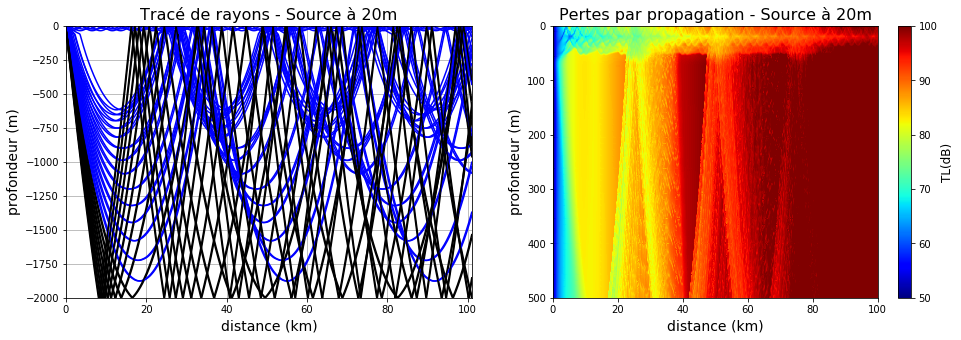

In [45]:
plt.figure(figsize=(16,5))

plt.subplot(121)
s.plotray('files_temp/SSP1_20m_R.ray')
plt.title('Tracé de rayons - Source à 20m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)


plt.subplot(122)
s.plotshd (geometry1_20, pressure1_20)
plt.title ('Pertes par propagation - Source à 20m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)

plt.savefig('prof1_source20m', dpi=100)

In [43]:
geometry1_70, pressure1_70 = s.readshd('files_temp/SSP1_70m_IB.shd')

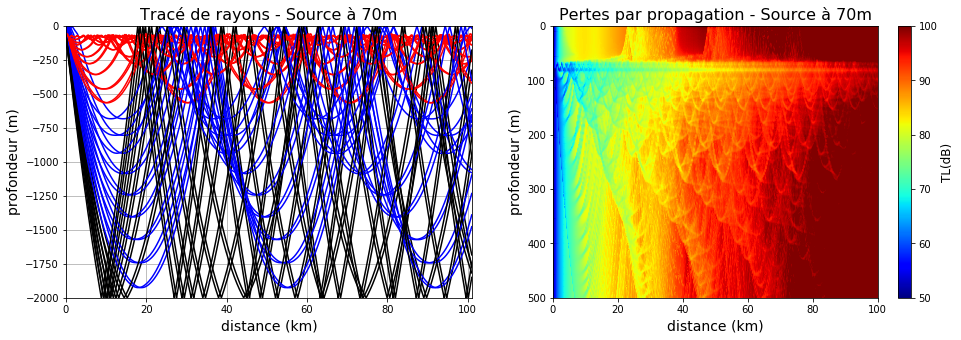

In [44]:
plt.figure(figsize=(16,5))

plt.subplot(121)
s.plotray('files_temp/SSP1_70m_R.ray')
plt.title('Tracé de rayons - Source à 70m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)


plt.subplot(122)
s.plotshd (geometry1_70, pressure1_70)
plt.title ('Pertes par propagation - Source à 70m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)

plt.savefig('prof1_source70m', dpi=100)

---
---
---
# Profil 2 

In [47]:
issp=1                          # sound speed profile number
depth_source = [50.]            # list of chosen source depths

## 'R' files
s.params['file_type'] = 'R'
s.params['ALimites'] = [-15.0, 15.0]
for i in depth_source : 
    s.params['zs']=i
    s.generate_envfile('mediterrannee',Issp=issp, SSP_depth_step=10, \
                        file_env ='SSP2_%dm_%s.env' %(i,s.params['file_type']))
    s.generate_btyfile(file_env = 'SSP2_%dm_%s.env' %(i,s.params['file_type']), bathy=2000.)

## 'IB' files    
s.params['file_type'] = 'IB'
s.params['ALimites'] = [-90.0, 90.0]
s.params['NDepth'] = 501
s.params['NRange'] = 1001
for i in depth_source : 
    s.params['zs']=i
    s.generate_envfile('mediterrannee',Issp=issp, SSP_depth_step=10, \
                        file_env = 'SSP2_%dm_%s.env' %(i,s.params['file_type']))
    s.generate_btyfile(file_env = 'SSP2_%dm_%s.env' %(i,s.params['file_type']), bathy=2000.)

In [48]:
geometry2_50, pressure2_50 = s.readshd('files_temp/SSP2_50m_IB.shd')

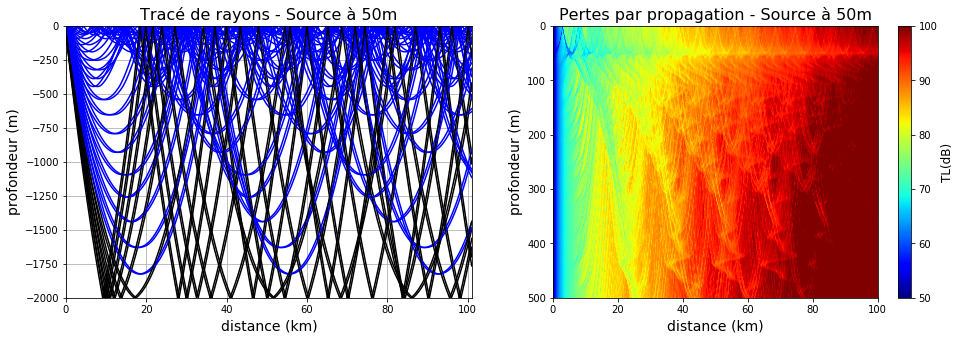

In [49]:
plt.figure(figsize=(16,5))

plt.subplot(121)
s.plotray('files_temp/SSP2_50m_R.ray')
plt.title('Tracé de rayons - Source à 50m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)


plt.subplot(122)
s.plotshd (geometry2_50, pressure2_50)
plt.title ('Pertes par propagation - Source à 50m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)

plt.savefig('prof2_source50m', dpi=100)

---
---
---
# profil 4 (température élevée en surface)

Pour le profil 4, la célérité décroît jusqu'à 50m de profondeur, puis le gradient devient positif. 

In [50]:
issp=3                          # sound speed profile number
depth_source = [20., 60.]       # list of chosen source depths

## 'R' files
s.params['file_type'] = 'R'
s.params['ALimites'] = [-15.0, 15.0]
for i in depth_source : 
    s.params['zs']=i
    s.generate_envfile('mediterrannee',Issp=issp, SSP_depth_step=10, \
                        file_env ='SSP4_%dm_%s.env' %(i,s.params['file_type']))
    s.generate_btyfile(file_env = 'SSP4_%dm_%s.env' %(i,s.params['file_type']), bathy=2000.)

## 'IB' files    
s.params['file_type'] = 'IB'
s.params['ALimites'] = [-90.0, 90.0]
s.params['NDepth'] = 501
s.params['NRange'] = 1001
for i in depth_source : 
    s.params['zs']=i
    s.generate_envfile('mediterrannee',Issp=issp, SSP_depth_step=10, \
                        file_env = 'SSP4_%dm_%s.env' %(i,s.params['file_type']))
    s.generate_btyfile(file_env = 'SSP4_%dm_%s.env' %(i,s.params['file_type']), bathy=2000.)

In [51]:
geometry4_20, pressure4_20 = s.readshd('files_temp/SSP4_20m_IB.shd')

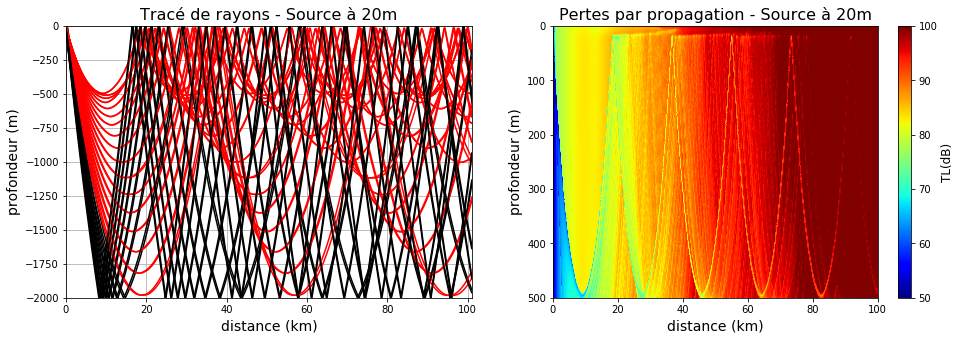

In [52]:
plt.figure(figsize=(16,5))

plt.subplot(121)
s.plotray('files_temp/SSP4_20m_R.ray')
plt.title('Tracé de rayons - Source à 20m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)


plt.subplot(122)
s.plotshd (geometry4_20, pressure4_20)
plt.title ('Pertes par propagation - Source à 20m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)

plt.savefig('prof4_source20m', dpi=100)

In [53]:
geometry4_60, pressure4_60 = s.readshd('files_temp/SSP4_60m_IB.shd')

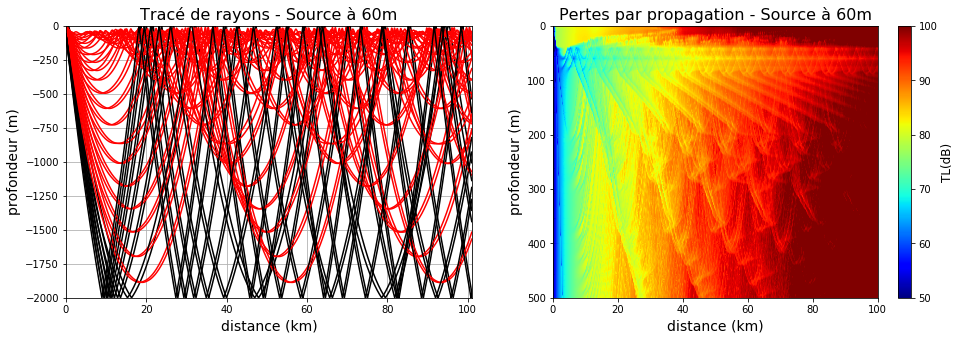

In [54]:
plt.figure(figsize=(16,5))

plt.subplot(121)
s.plotray('files_temp/SSP4_60m_R.ray')
plt.title('Tracé de rayons - Source à 60m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)


plt.subplot(122)
s.plotshd (geometry4_60, pressure4_60)
plt.title ('Pertes par propagation - Source à 60m', fontsize=16)
plt.xlabel('distance (km)', fontsize = 14)
plt.ylabel('profondeur (m)', fontsize = 14)

plt.savefig('prof4_source60m', dpi=100)

---
---
---
# Résultats pour le profil du Gulf Stream


## 1er profil  

1 grid file found, uses: /home/datawork-lops-osi/jgula/NESED/nesea_grd.nc
-- Grid object
dim lon_rho: 1602  2002
lon_rho min= -72.123, max=-58.273
lat_rho min= 34.123, max=43.734
h min= 20.000, max=5543.070
Uses the following output file: /home/datawork-lops-osi/jgula/NESED/nesed_avg.00060.nc


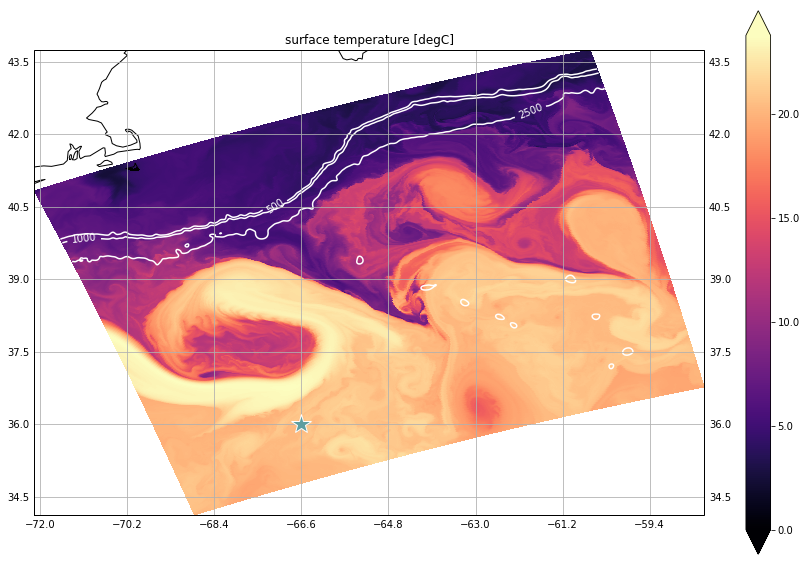

In [24]:
g = bellhop({'gs': {'datadir': '/home/datawork-lops-osi/jgula/NESED/', 'lon': -66.6, \
                    'lat': 36., 'plot_map': True, 'contour':True}}, zmax = 4900)

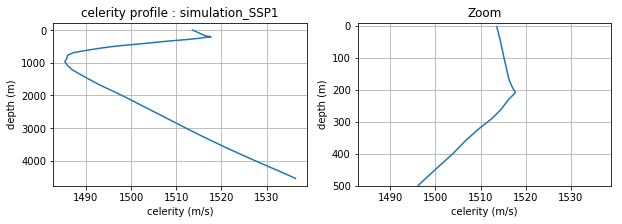

In [13]:
#plt.plot(g.SSP['gs']['c'][0,:], -g.SSP['gs']['depth'][:])
g.plotssp('gs', y_zoom=500)

In [5]:
g.params

{'name': 'simulation',
 'freq': 3000.0,
 'zs': 50.0,
 'zmax': 4900,
 'rmax': 100.0,
 'NDepth': 4901.0,
 'NRange': 10001.0,
 'ALimites': [-15.0, 15.0],
 'file_type': 'R',
 'file_bathy': 'simulation.bty',
 'file_env': 'simulation.env',
 'file_ssp': 'simulation.ssp'}

### Source à 5m

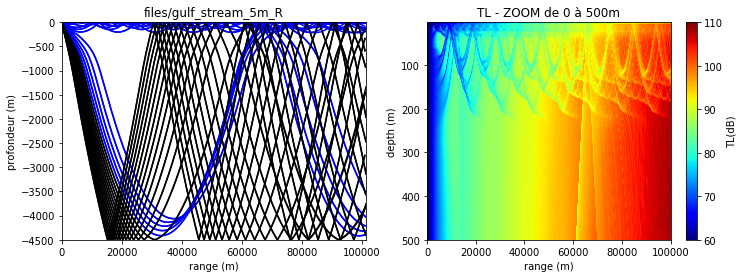

In [6]:
g.plot_all(file_ray = 'files/gulf_stream_5m_R.ray', \
           file_shd = 'files/gulf_stream_5m_IB.shd')

### Source à 50m

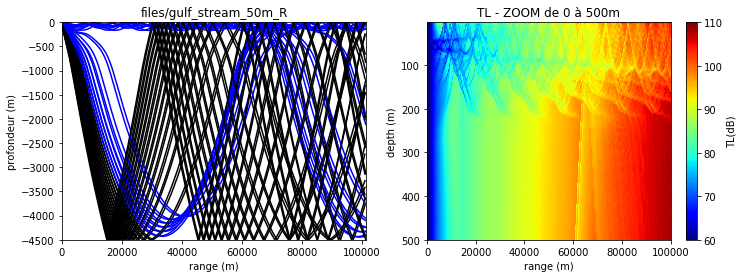

In [7]:
g.plot_all(file_ray = 'files/gulf_stream_50m_R.ray', \
           file_shd = 'files/gulf_stream_50m_IB.shd')

### Source à 100m

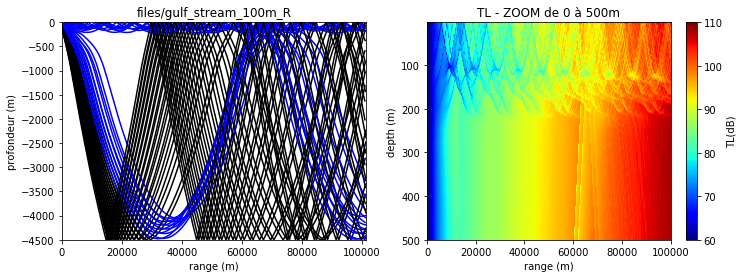

In [9]:
g.plot_all(file_ray = 'files/gulf_stream_100m_R.ray', \
           file_shd = 'files/gulf_stream_100m_IB.shd')

### Interprétation

- Les 3 résultats sont similaires : rayons réfractés sur 200m de profondeur, mais nombreuses zones d'ombres. 
- Absence de rayons réfractés sur la tranche 200-500m.
- Une zone de résurgence à 65-70km.


## 2ème profil

1 grid file found, uses: /home/datawork-lops-osi/jgula/NESED/nesea_grd.nc
-- Grid object
dim lon_rho: 1602  2002
lon_rho min= -72.123, max=-58.273
lat_rho min= 34.123, max=43.734
h min= 20.000, max=5543.070
Uses the following output file: /home/datawork-lops-osi/jgula/NESED/nesed_avg.00060.nc


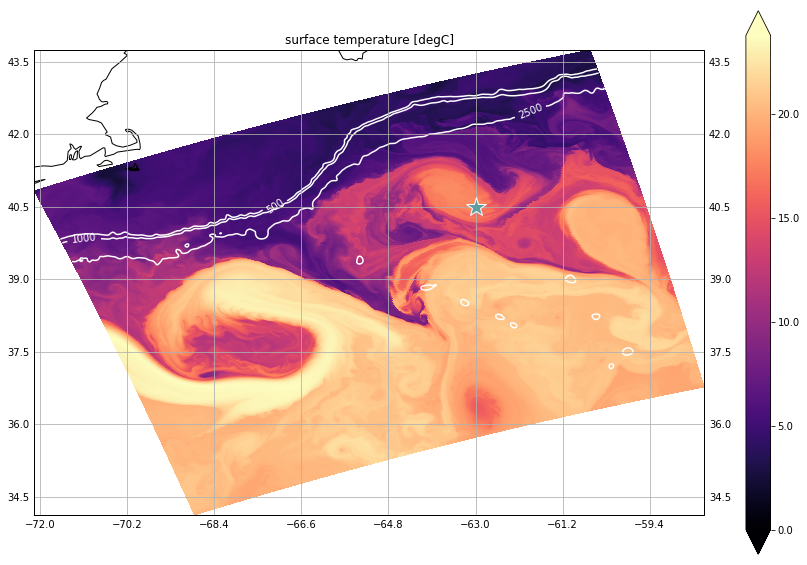

In [25]:
g = bellhop({'gs': {'datadir': '/home/datawork-lops-osi/jgula/NESED/', 'lon': -63, \
                    'lat': 40.5, 'plot_map': True, 'contour':True}}, zmax = 4900)

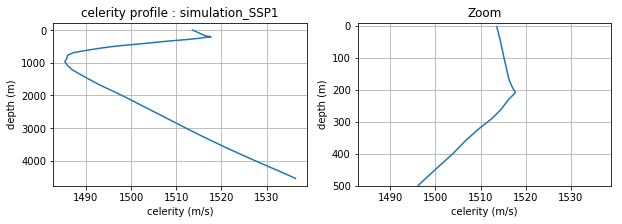

In [12]:
#plt.plot(g.SSP['gs']['c'][0,:], -g.SSP['gs']['depth'][:])
g.plotssp('gs', y_zoom = 500)

### Source à 100m

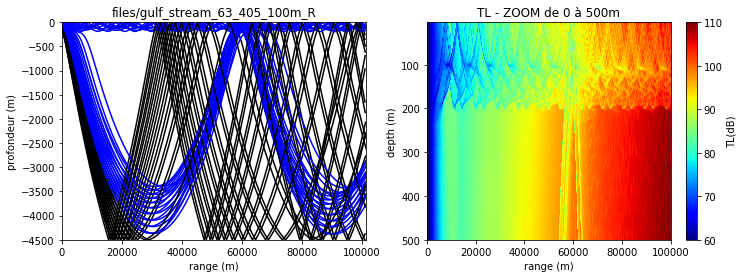

In [9]:
g.plot_all(file_ray = 'files/gulf_stream_63_405_100m_R.ray', \
           file_shd = 'files/gulf_stream_63_405_100m_IB.shd')

### Interprétation

Profil similaire au 1er cas.

## 3ème profil

1 grid file found, uses: /home/datawork-lops-osi/jgula/NESED/nesea_grd.nc
-- Grid object
dim lon_rho: 1602  2002
lon_rho min= -72.123, max=-58.273
lat_rho min= 34.123, max=43.734
h min= 20.000, max=5543.070
Uses the following output file: /home/datawork-lops-osi/jgula/NESED/nesed_avg.00060.nc


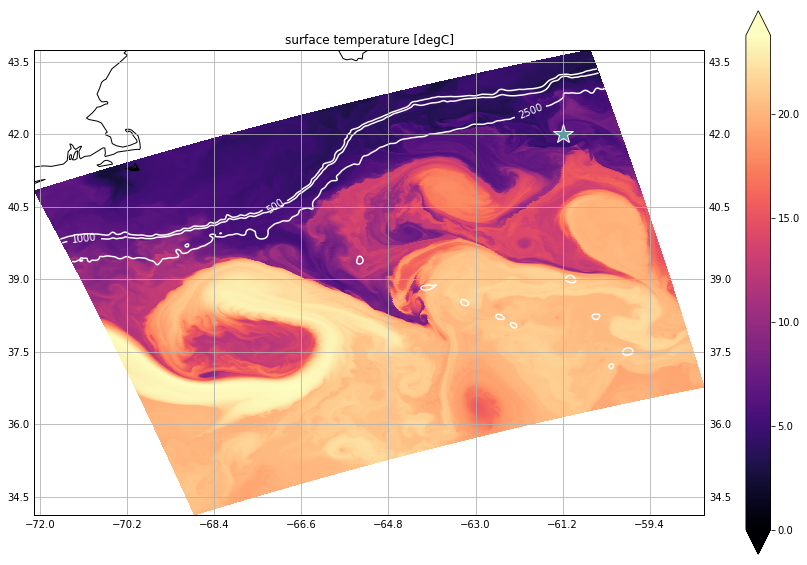

In [3]:
g = bellhop({'gs': {'datadir': '/home/datawork-lops-osi/jgula/NESED/', 'lon': -61.2, \
                    'lat': 42., 'plot_map': True, 'contour':True}}, zmax = 4900)

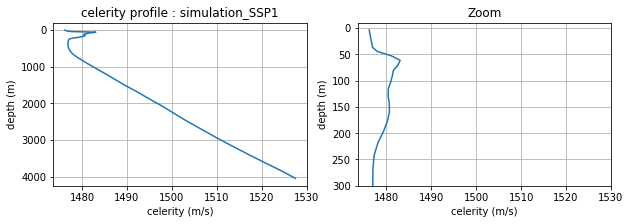

In [4]:
g.plotssp('gs',y_zoom = 300)

### Source à 50m

- chenal de surface sur 50m de profondeur.
- 2 zones de résurgence à 35 et 70 km.

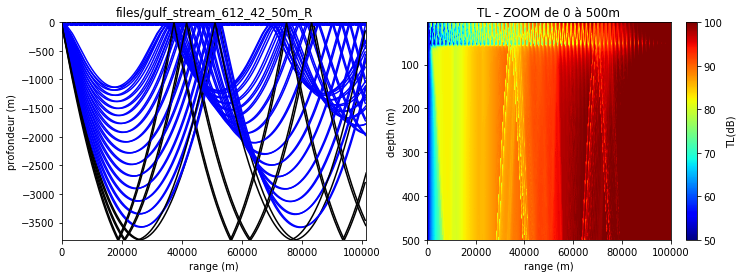

In [6]:
g.plot_all(file_ray = 'files/gulf_stream_612_42_50m_R.ray', \
           file_shd = 'files/gulf_stream_612_42_50m_IB.shd')

### Source à 100m

- disparition du chenal de surface. 
- 2 zones de résurgence à 35 et 70 km toujours présentes.

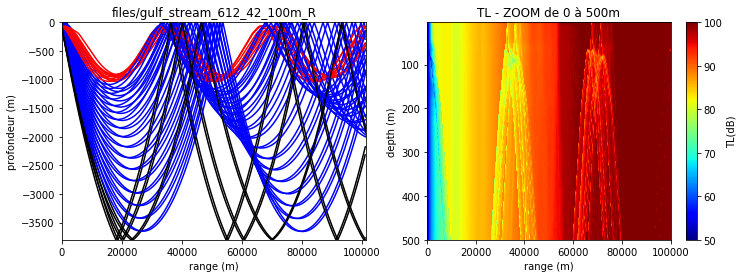

In [7]:
g.plot_all(file_ray = 'files/gulf_stream_612_42_100m_R.ray', \
           file_shd = 'files/gulf_stream_612_42_100m_IB.shd')

### Interprétation

Si on se place entre 100 et 500m de profondeur, on a seulement deux zones de résurgence. Les profils du Gulf Stream étudiés ici ne sont pas favorables à notre étude...  